# Important Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Input , Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.activations import relu
from tensorflow.keras import  regularizers
from tensorflow.keras import backend as K

## Preparing the Data for ANN

In [4]:
# Load dataset
GT = pd.read_csv("C:/Users/Omid/Desktop/MDTE/Challenge 2/DT/DATASETS/gt_full.csv")

# Seperating feature and label
Target = GT[['CO','NOX']]

Feature = GT.drop(columns=['CO','NOX',],axis=1)
Feature.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
X , X_test, Y, Y_test = train_test_split(Feature,Target, test_size=0.15, random_state = 42)

Y_CO = Y['CO']
Y_NOX = Y['NOX']
Y_CO_test = Y_test['CO']
Y_NOX_test = Y_test['NOX']

Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_test_scaled = Scaler.transform(X_test)
minmax = MinMaxScaler()
X__MinMax_scaled = minmax.fit_transform(X)
X_test_MinMax = minmax.transform(X_test)
X_train_minmax , X_val_minmax , Y_train_minmax, Y_val_minmax = train_test_split(X__MinMax_scaled,Y,test_size=0.15,random_state=42 )

X_train_scaled , X_val_scaled , Y_train_scaled,Y_val_scaled = train_test_split(X_scaled,Y,test_size=0.15,random_state=42)
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


## Finalized Model

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2140.2053 - root_mean_squared_error: 39.7915 - val_loss: 152.4465 - val_root_mean_squared_error: 9.0175
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 314.1754 - root_mean_squared_error: 13.8694 - val_loss: 133.7814 - val_root_mean_squared_error: 8.6515
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 250.2335 - root_mean_squared_error: 12.3448 - val_loss: 129.4590 - val_root_mean_squared_error: 8.5007
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 220.3551 - root_mean_squared_error: 11.5632 - val_loss: 118.1147 - val_root_mean_squared_error: 8.1526
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 196.4178 - root_mean_squared_error: 10.8494 - val_loss: 110.7544 - val_root_mean_squared_error: 7.9242
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 179.3716 - root_mean_squared_error: 10.3370 - val_loss: 105.6449 - val_root_mean_squared_error: 7.7187
Epoch 7/200
830

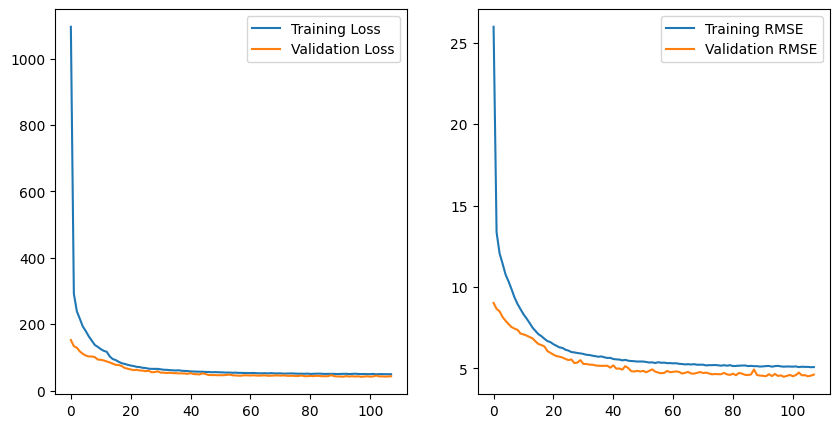

In [ ]:
ANN_11 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_11.compile(optimizer=keras.optimizers.Adam(clipnorm=1.,learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_11 = ANN_11.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,
                      validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])



DF11 = pd.DataFrame(Model_11.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF11['loss'],label='Training Loss')
plt.plot(DF11['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF11['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF11['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [4]:
ANN_11.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.1711 - root_mean_squared_error: 4.5151


[39.939884185791016, 4.5116963386535645]

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1628.2786 - root_mean_squared_error: 32.4333 - val_loss: 130.4955 - val_root_mean_squared_error: 8.6134
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 224.2033 - root_mean_squared_error: 11.6783 - val_loss: 114.7547 - val_root_mean_squared_error: 8.0602
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 193.8074 - root_mean_squared_error: 10.7715 - val_loss: 111.1598 - val_root_mean_squared_error: 7.8308
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 162.8931 - root_mean_squared_error: 9.7870 - val_loss: 103.0817 - val_root_mean_squared_error: 7.5401
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 139.4770 - root_mean_squared_error: 9.0024 - val_loss: 97.9216 - val_root_mean_squared_error: 7.3161
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 125.3416 - root_mean_squared_error: 8.3771 - val_loss: 91.9943 - val_root_mean_squared_error: 7.0946
Epoch 7/200
830/830 

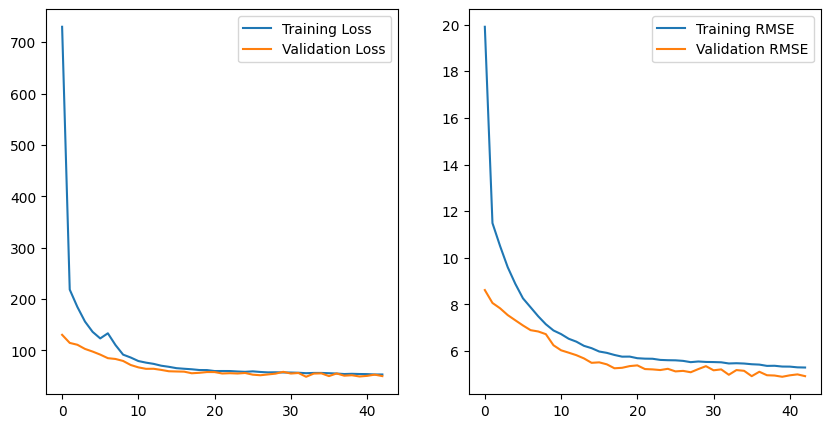

In [5]:
ANN_12 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_12.compile(optimizer=keras.optimizers.Adam(clipnorm=1.,learning_rate=0.001),loss='mse',metrics=[root_mean_squared_error])
Model_12 = ANN_12.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF12 = pd.DataFrame(Model_12.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF12['loss'],label='Training Loss')
plt.plot(DF12['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF12['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF12['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [6]:
ANN_12.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.6486 - root_mean_squared_error: 4.8061


[45.845943450927734, 4.8088154792785645]

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2083.6252 - root_mean_squared_error: 38.8175 - val_loss: 179.1877 - val_root_mean_squared_error: 9.5560
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 401.5096 - root_mean_squared_error: 15.7513 - val_loss: 152.8915 - val_root_mean_squared_error: 9.0668
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 310.2836 - root_mean_squared_error: 13.7495 - val_loss: 138.9524 - val_root_mean_squared_error: 8.7968
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 272.6507 - root_mean_squared_error: 12.9054 - val_loss: 129.9749 - val_root_mean_squared_error: 8.5711
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 238.5631 - root_mean_squared_error: 12.0144 - val_loss: 120.9452 - val_root_mean_squared_error: 8.3061
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 218.7589 - root_mean_squared_error: 11.4748 - val_loss: 113.2543 - val_root_mean_squared_error: 8.0883
Epoch 7/200
830

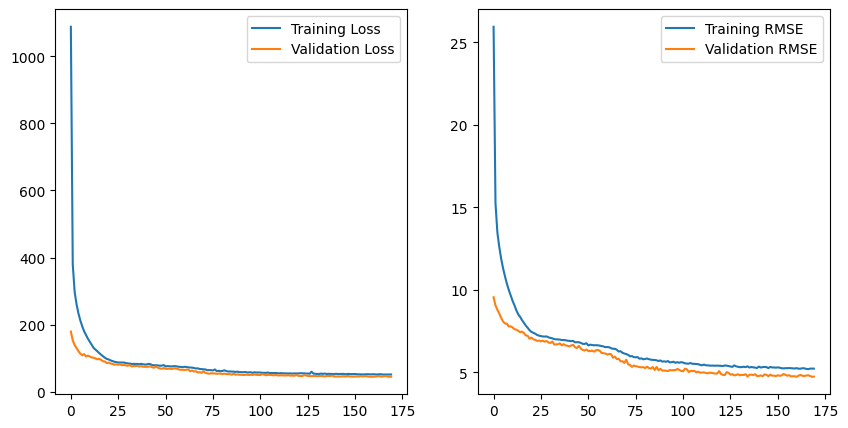

In [7]:
ANN_6 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_6.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_6 = ANN_6.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF6 = pd.DataFrame(Model_6.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF6['loss'],label='Training Loss')
plt.plot(DF6['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF6['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF6['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

In [8]:
ANN_6.evaluate(X_test_MinMax,Y_NOX_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.9512 - root_mean_squared_error: 4.6616


[41.82482147216797, 4.670144557952881]

Epoch 1/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3969.9114 - root_mean_squared_error: 61.7116 - val_loss: 1214.0078 - val_root_mean_squared_error: 32.4513
Epoch 2/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 949.4549 - root_mean_squared_error: 25.8010 - val_loss: 198.0558 - val_root_mean_squared_error: 9.9467
Epoch 3/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 533.9066 - root_mean_squared_error: 18.3507 - val_loss: 172.7309 - val_root_mean_squared_error: 9.4117
Epoch 4/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 434.3922 - root_mean_squared_error: 16.3809 - val_loss: 154.8809 - val_root_mean_squared_error: 9.0591
Epoch 5/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 351.4146 - root_mean_squared_error: 14.6958 - val_loss: 144.9500 - val_root_mean_squared_error: 8.8756
Epoch 6/200
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 308.2201 - root_mean_squared_error: 13.7173 - val_loss: 142.6388 - val_root_mean_squared_error: 8.8163
Epoch 7/200
8

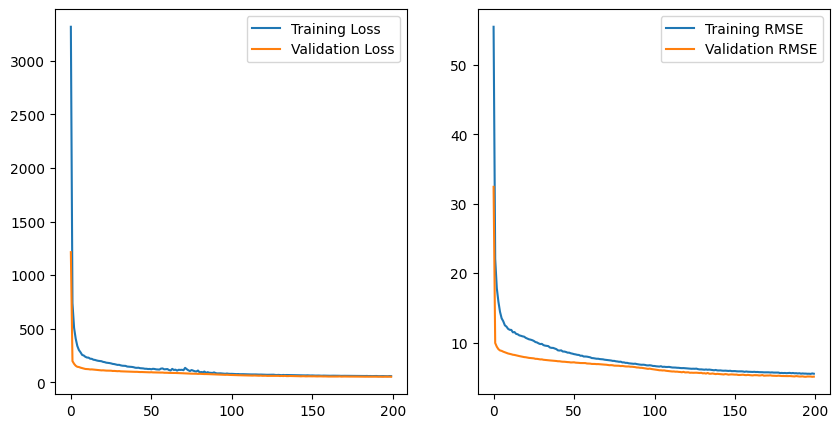

In [9]:
ANN_111 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_111.compile(optimizer=keras.optimizers.Adam(clipnorm=1.,learning_rate=0.0001),loss='mse',metrics=[root_mean_squared_error])
Model_111 = ANN_111.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=200,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF111 = pd.DataFrame(Model_111.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF111['loss'],label='Training Loss')
plt.plot(DF111['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF111['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF111['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

Epoch 1/300
830/830 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4031.2310 - root_mean_squared_error: 62.2394 - val_loss: 1722.7465 - val_root_mean_squared_error: 39.5392
Epoch 2/300
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1198.0146 - root_mean_squared_error: 29.8629 - val_loss: 225.6562 - val_root_mean_squared_error: 10.5404
Epoch 3/300
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 588.9130 - root_mean_squared_error: 19.3099 - val_loss: 192.8281 - val_root_mean_squared_error: 9.8267
Epoch 4/300
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 487.3564 - root_mean_squared_error: 17.4847 - val_loss: 173.5714 - val_root_mean_squared_error: 9.4424
Epoch 5/300
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 418.8503 - root_mean_squared_error: 16.0611 - val_loss: 169.7167 - val_root_mean_squared_error: 9.3886
Epoch 6/300
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 361.7444 - root_mean_squared_error: 14.8987 - val_loss: 155.5764 - val_root_mean_squared_error: 9.0858
Epoch 7/300

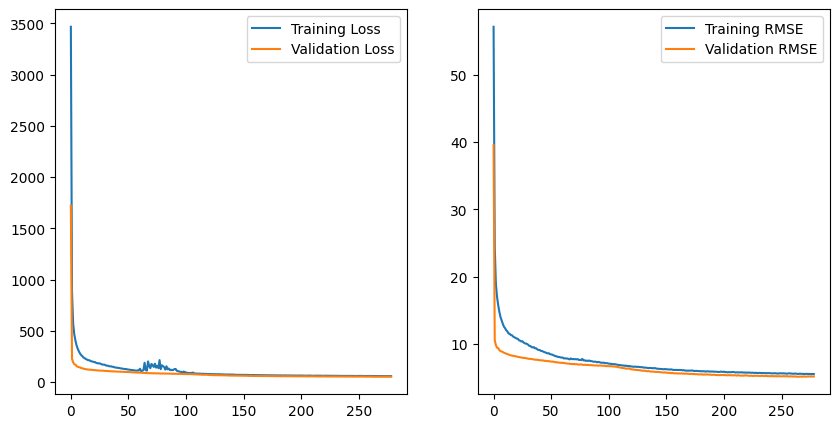

In [10]:
ANN_112 = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_112.compile(optimizer=keras.optimizers.Adam(clipnorm=1.,learning_rate=0.0001),loss='mse',metrics=[root_mean_squared_error])
Model_112 = ANN_112.fit(X_train_minmax,Y_train_minmax['NOX'],epochs=300,batch_size=32,verbose=1,validation_data=[X_val_minmax,Y_val_minmax['NOX']],callbacks=[EarlyStopping(monitor='val_loss',patience=10)])
DF112 = pd.DataFrame(Model_112.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(DF112['loss'],label='Training Loss')
plt.plot(DF112['val_loss'],label='Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(DF112['root_mean_squared_error'],label='Training RMSE')
plt.plot(DF112['val_root_mean_squared_error'],label='Validation RMSE')
plt.legend()
plt.show()

## Final Tuned Model

In [5]:
ANN_final = Sequential([Input(shape=(9,)),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(32,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),
                  Dropout(0.5),
                  Dense(16,activation = 'elu',kernel_regularizer=regularizers.l2(0.001)),

                  Dense(1)])
ANN_final.compile(optimizer=keras.optimizers.Adam(clipnorm=1.,learning_rate=0.0005),loss='mse',metrics=[root_mean_squared_error])
Model_final = ANN_final.fit(X__MinMax_scaled,Y_NOX,epochs=200,batch_size=32,verbose=1,callbacks=[EarlyStopping(patience=10)])





Epoch 1/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2101.3809 - root_mean_squared_error: 39.0525
Epoch 2/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 314.7625 - root_mean_squared_error: 13.8931
Epoch 3/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 244.9820 - root_mean_squared_error: 12.2134
Epoch 4/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 220.6622 - root_mean_squared_error: 11.5837
Epoch 5/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 191.8914 - root_mean_squared_error: 10.7467
Epoch 6/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 175.2125 - root_mean_squared_error: 10.1924
Epoch 7/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 157.7607 - root_mean_squared_error: 9.6521
Epoch 8/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 146.7418 - root_mean_squared_error: 9.2793
Epoch 9/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 135.7859 - root_mean_squared_error: 8.8487
Epoch 10/200
976/976 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - l

## Final Model is Model 11

In [7]:
from sklearn.metrics import root_mean_squared_error
Y_pred_NOX_final = ANN_final.predict(X_test_MinMax)
RMSE1 = root_mean_squared_error(Y_NOX_test,Y_pred_NOX_final)
print(f'Best root Mean Square Error is :', RMSE1)

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best root Mean Square Error is : 6.244019784814955


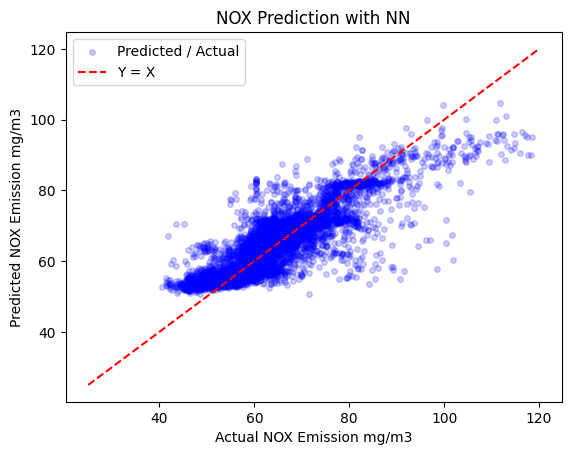

In [9]:
plt.figure()
plt.title('NOX Prediction with NN')
plt.scatter(Y_NOX_test,Y_pred_NOX_final , s=16,alpha=0.2 , c='blue',
            label = 'Predicted / Actual')
plt.plot([25,120],[25,120],color='red',linestyle = '--',
         label = 'Y = X')
plt.legend(loc = 'upper left')
plt.xlabel('Actual NOX Emission mg/m3')
plt.ylabel('Predicted NOX Emission mg/m3')
plt.show()

In [8]:
Y_pred_NOX

NameError: name 'Y_pred_NOX' is not defined

In [14]:
Y_NOX_test

28828    60.048
4009     61.635
17990    69.073
263      61.352
34917    50.450
          ...  
13741    59.748
8510     58.819
12918    60.428
24691    60.915
46       74.746
Name: NOX, Length: 5510, dtype: float64

In [17]:
from sklearn.metrics import root_mean_squared_error
RMSE1 = root_mean_squared_error(Y_NOX_test,Y_pred_NOX)
print(f'Best root Mean Square Error is :', RMSE1)

Best root Mean Square Error is : 6.288685148329935
